# Data Aggregation
## Problem Statement:
Analyzing Sales Performance by Region in a Retail Company
## Dataset:
"Retail_Sales_Data.csv"
## Description:
The dataset contains information about sales transactions in a retail company. It includes attributes such as transaction date, product category, quantity sold, and sales amount. The goal is to perform data aggregation to analyze the sales performance by region and identify the top-performing regions.
## Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales
amount for each combination.
8. Create stacked bar plots or grouped bar plots to 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import dataset

In [2]:
df = pd.read_csv("Retail_Sales_Data.csv")

### 2. Explore dataset

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [7]:
df.shape

(6435, 8)

### 3. Relevant variables
* Region → Store
* Sales Amount → Weekly_Sales
* Product Category → Holiday_Flag 

### 4. Group sales by region (Store) and calculate total sales

In [8]:
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Store:\n", sales_by_store)


Total Sales by Store:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


### 5. Bar plot for sales by store

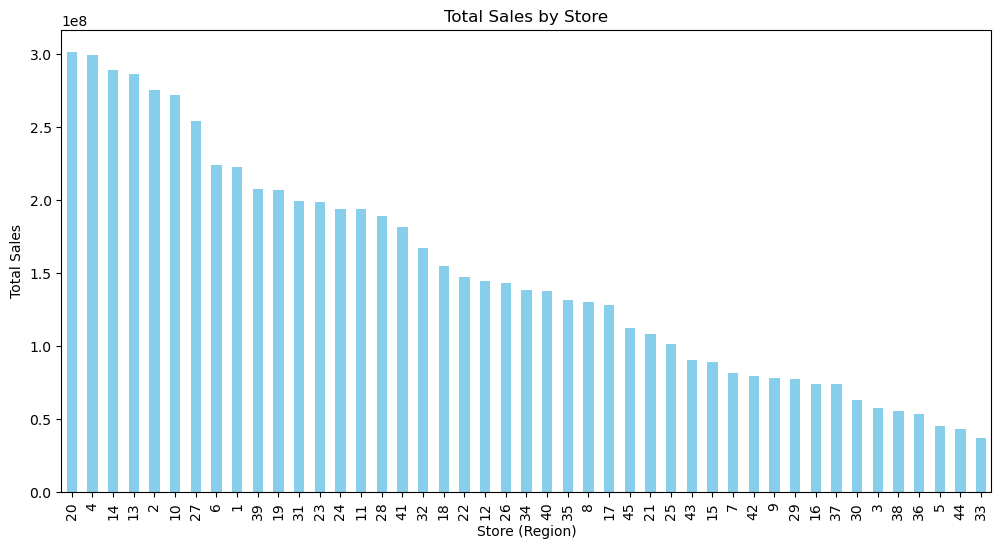

In [9]:
plt.figure(figsize=(12,6))
sales_by_store.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Store")
plt.xlabel("Store (Region)")
plt.ylabel("Total Sales")
plt.show()

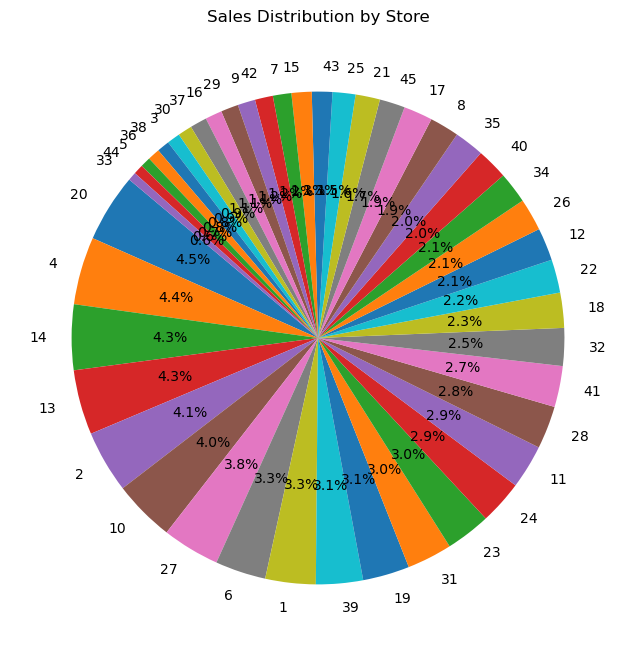

In [10]:
plt.figure(figsize=(8,8))
sales_by_store.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel("")
plt.title("Sales Distribution by Store")
plt.show()

### 6. Top performing regions

In [11]:
top_stores = sales_by_store.head(5)
print("\nTop Performing Stores:\n", top_stores)


Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


### 7. Group sales by region and product category (Holiday_Flag)

In [12]:
sales_store_category = df.groupby(['Store','Holiday_Flag'])['Weekly_Sales'].sum().unstack(fill_value=0)
print("\nSales by Store and Holiday Flag:\n", sales_store_category.head())


Sales by Store and Holiday Flag:
 Holiday_Flag             0            1
Store                                  
1             2.057453e+08  16657476.56
2             2.545898e+08  20792669.00
3             5.320862e+07   4378110.50
4             2.771129e+08  22431026.24
5             4.188067e+07   3595016.07


### 8. Comparisonsof the Sales Amount across different Regions & Product Categories:
#### a. Stacked Bar Plot

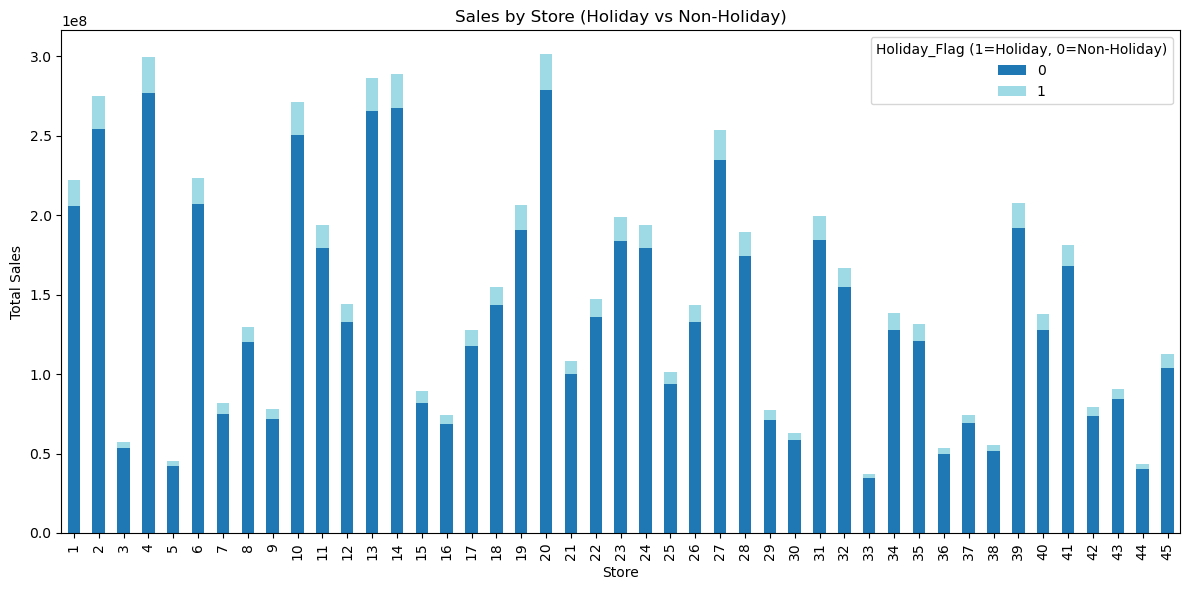

In [13]:
sales_store_category.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Sales by Store (Holiday vs Non-Holiday)")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.legend(title="Holiday_Flag (1=Holiday, 0=Non-Holiday)")
plt.tight_layout()
plt.show()

#### b. Grouped Bar Plot

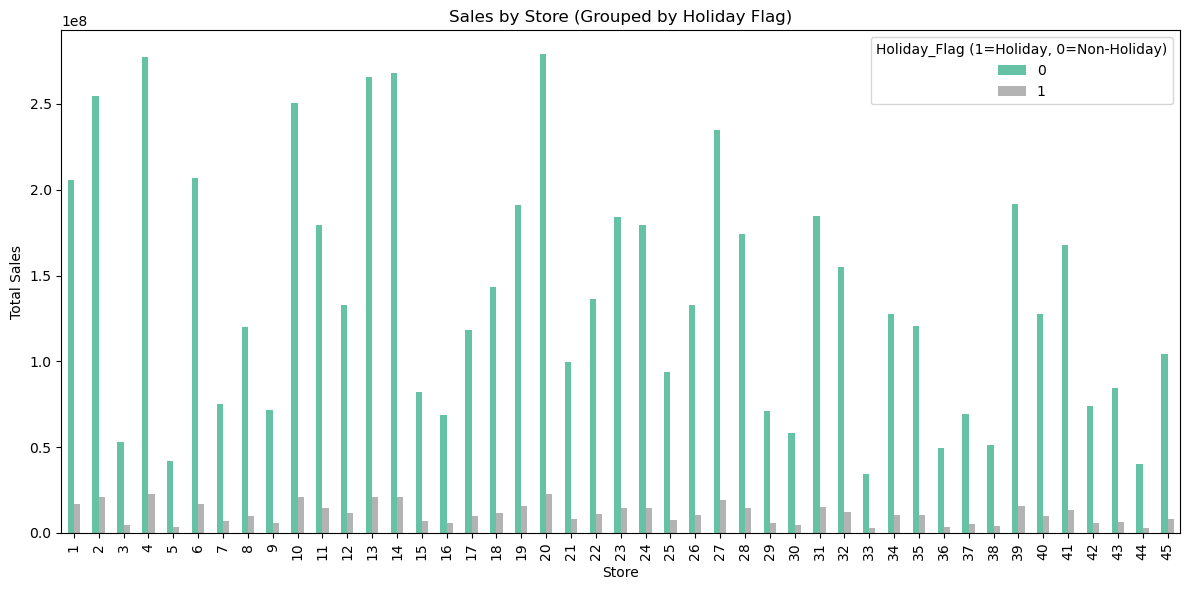

In [14]:
sales_store_category.plot(kind='bar', stacked=False, figsize=(12,6), colormap='Set2')
plt.title("Sales by Store (Grouped by Holiday Flag)")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.legend(title="Holiday_Flag (1=Holiday, 0=Non-Holiday)")
plt.tight_layout()
plt.show()